In [ ]:
# Instalando dependencias
pip install matplotlib
pip install scipy
pip install scikit-image
pip install pillow

In [1]:
import matplotlib.cm as cm 
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import matplotlib
%matplotlib inline

from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import entropy
import scipy.misc
import scipy.ndimage

from skimage import data, io, filters, color, feature
from skimage.color import rgb2gray

from PIL import Image
from PIL import ImageEnhance

from os import listdir
from os.path import isfile, join 
import os

import pywt 
import pywt.data

import math
import csv
import numpy as np
import cv2

print("Librerias cargadas correctamente")

Successfullly imported all libraries


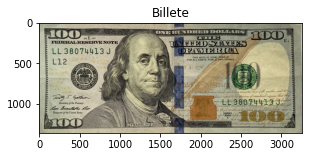

In [60]:
def graficarImagen(im1, cmap=None): 
    fig = plt.figure(figsize=(16,10))

    ax1 = fig.add_subplot(1,3,1) 

    ax1.set_title('Billete')

    ax1.imshow(im1, cmap=cmap)
        
billete = Image.open('images/dollar_note.jpg') 

graficarImagen(billete)

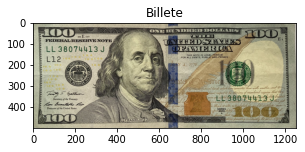

In [65]:
nuevotam = (1250,500)
billete_redimensionado = billete.resize(nuevotam) 
graficarImagen(billete_redimensionado)

In [18]:
#Estas son las partes esenciales que hay que analizar para comprobar si el billete es auténtico o no. Podemos ver que el billete de 100 dólares ha evolucionado (color y forma), lo que hace que muchas de las partes recortadas sean irrelevantes para el análisis.
#Sin embargo, la cabeza de Franklin y el valor del billete (100 dólares) parecen ser estables. Por lo tanto, si se necesita un proceso más avanzado, nos centraremos más en esos dos cultivos.

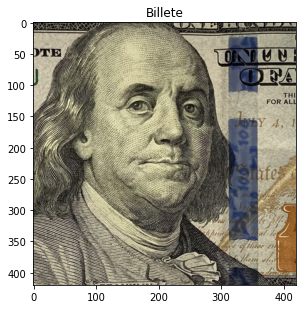

In [66]:
#Dimensiones a reducir
izq, arriba, derecha, abajo = 330, 40, 750, 460
billete_recortado = billete_resized.crop((izq, arriba, derecha, abajo))
graficarImagen(billete_recortado)

In [75]:
def mejorar_brillo(imagen, brillo):
    brillo_mejorado = ImageEnhance.Brightness(imagen) 
    return brillo_mejorado.enhance(brillo)

def mejorar_nitidez(imagen, nitidez): 
    nitidez_mejorada = ImageEnhance.Sharpness(imagen) 
    return nitidez_mejorada.enhance(nitidez)

def mejorar_color(imagen, color): 
    color_mejorado = ImageEnhance.Color(imagen)
    return color_mejorado.enhance(color)

def mejorar_contraste(imagen, contraste): 
    contraste_mejorado = ImageEnhance.Contrast(imagen) 
    return contraste_mejorado.enhance(contraste)

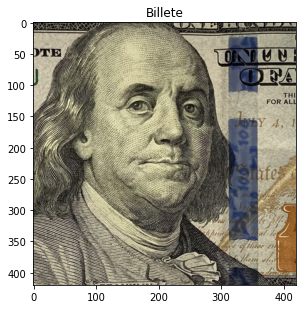

In [76]:
imagen_brillo_mejorado = mejorar_brillo(billete_recortado, 1) 
graficarImagen(imagen_brillo_mejorado)

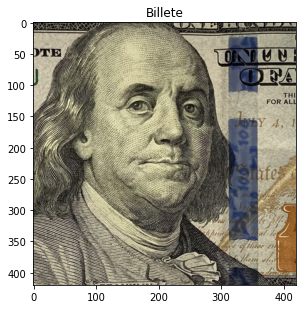

In [77]:
imagen_nitidez_mejorada = mejorar_nitidez(imagen_brillo_mejorado, 1)
graficarImagen(imagen_nitidez_mejorada)

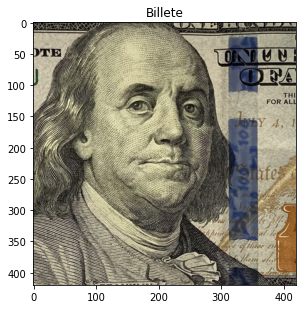

In [83]:
imagen_color_mejorado = mejorar_color(imagen_nitidez_mejorada, 1)
graficarImagen(imagen_color_mejorado)

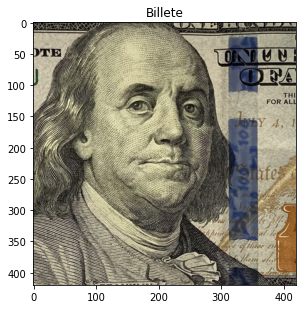

In [85]:
imagen_contraste_mejorado = mejorar_contraste(imagen_color_mejorado, 1) 
graficarImagen(imagen_contraste_mejorado)

In [89]:
# Ya tener creado el directorio images_processed
imagen_contraste_mejorado.save("images_processed/billete_mejorado.png") 
print(">>>>>> Imagen guardada <<<<<")

>>>>>> Imagen guardada <<<<<


In [90]:
billete_mejorado = cv2.imread("images_processed/billete_mejorado.png",0)
print(">>>>>> Imagen cargada <<<<<")

>>>>>> Imagen cargada <<<<<


/var/folders/rj/d1_f0wr155v4mbwjw00pr9680000gn/T/ipykernel_7155/4121071409.py:7: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  billete_escalagrises = color.rgb2gray(billete_mejorado)


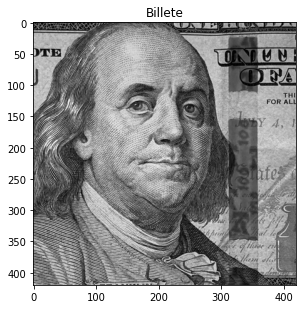

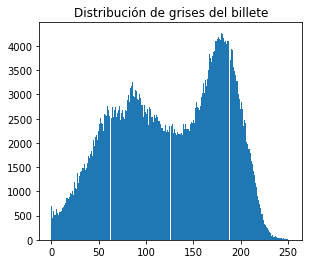

In [92]:
def graficarHistograma(im1, cmap=None): 
    fig = plt.figure(figsize=(16,4))
    ax1 = fig.add_subplot(1,3,1)
    ax1.set_title('Distribución de grises del billete') 
    ax1.hist(im1.flatten(), bins = 256) 
        
billete_escalagrises = color.rgb2gray(billete_mejorado)
billete_escalacolor = color.gray2rgb(billete_escalagrises)

graficarImagen(billete_escalacolor)
graficarHistograma(billete_escalacolor)

In [93]:
 # Guardando un np.ndarray como png, usando matplotlib
plt.imsave("images_processed/billete_escalagrises.png", billete_escalagrises, cmap='gray')
print(">>>>>> Imagen guarda <<<<<")

>>>>>> Imagen guarda <<<<<


In [33]:
billete_escalagrises = cv2.imread("images_processed/billete_escalagrises.png",0) 
print(">>>>>> Imagen cargada <<<<<")

>>>>>> Loaded <<<<<


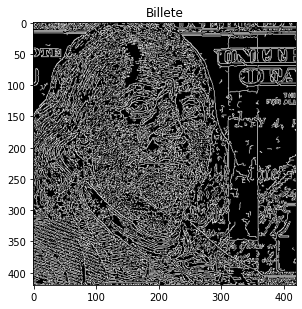

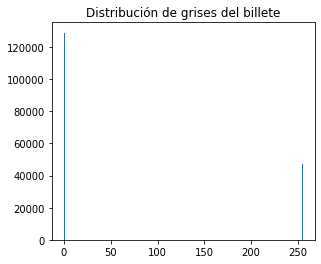

In [108]:
billete_canny= cv2.Canny(billete_escalagrises,100,200) 

graficarImagen(billete_canny, 'gray')
graficarHistograma(billete_canny)

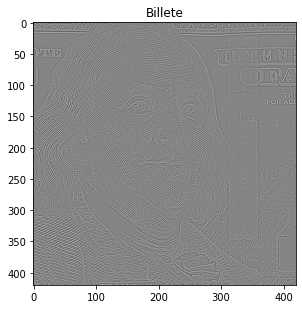

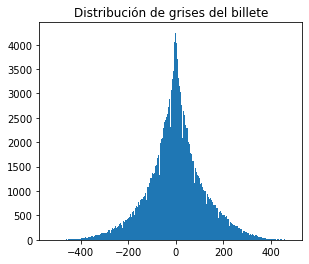

In [109]:
# cv2.CV_16S, cv2.CV_32F, cv2.CV_64F, cv2.CV_8U
billete_laplaciano = cv2.Laplacian(billete_escalagrises,cv2.CV_64F) 

graficarImagen(billete_laplaciano, 'gray')
graficarHistograma(billete_laplaciano)

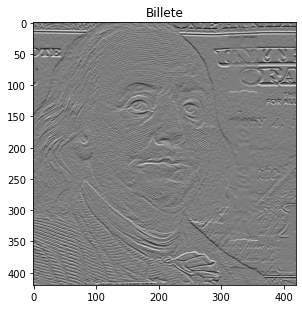

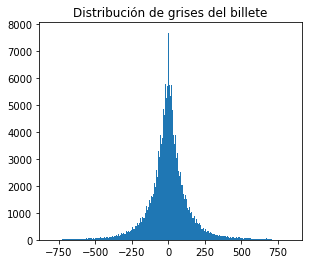

In [110]:
sobel = cv2.Sobel(billete_escalagrises,cv2.CV_64F,0,1,ksize=3) 

graficarImagen(sobel, 'gray')
graficarHistograma(sobel)

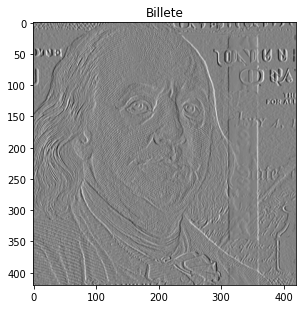

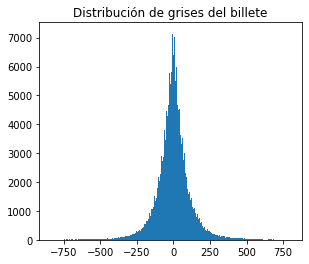

In [111]:
billete_sobel = cv2.Sobel(billete_escalagrises,cv2.CV_64F,1,0,ksize=3) 

graficarImagen(billete_sobel, 'gray')
graficarHistograma(billete_sobel)

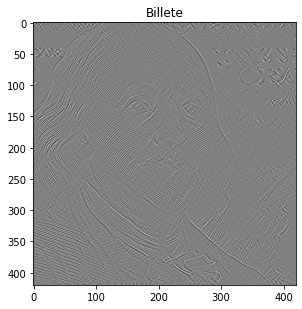

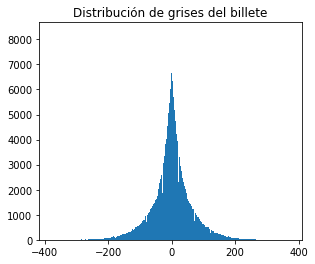

In [112]:
billete_sobel = cv2.Sobel(billete_escalagrises,cv2.CV_64F,1,1,ksize=3) 

graficarImagen(billete_sobel, 'gray')
graficarHistograma(billete_sobel)

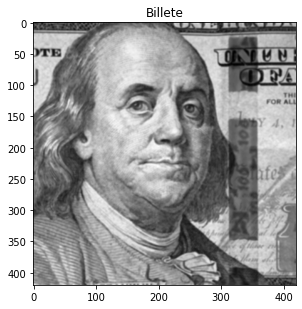

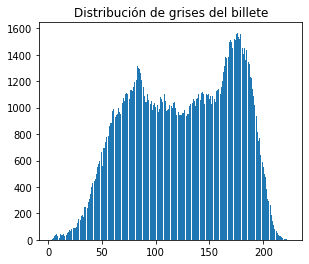

In [113]:
billete_gaussiano = cv2.GaussianBlur(billete_escalagrises,(5,5),0) 

graficarImagen(billete_gaussiano, 'gray')
graficarHistograma(billete_gaussiano)

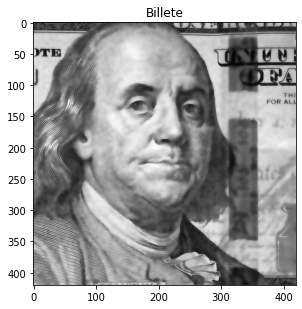

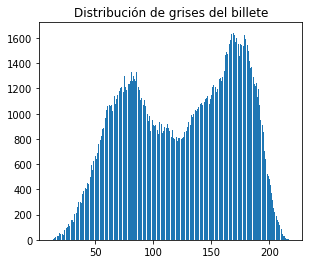

In [115]:
billete_bilateral = cv2.bilateralFilter(billete_escalagrises,9,75,75) 

graficarImagen(billete_bilateral, 'gray')
graficarHistograma(billete_bilateral)

In [116]:
 # Guardando np.ndarray como png, usando matplotlib
plt.imsave("images_processed/billete_canny.png", billete_canny, cmap='gray') 

plt.imsave("images_processed/billete_laplaciano.png", billete_laplaciano, cmap='gray') 

plt.imsave("images_processed/billete_sobel.png", billete_sobel, cmap='gray') 

plt.imsave("images_processed/billete_gaussiano.png", billete_gaussiano, cmap='gray') 

plt.imsave("images_processed/note_bilateral.png", billete_bilateral, cmap='gray') 

print(">>>>>> Imágenes guardadas <<<<<")

>>>>>> Imagenes guardadas <<<<<


In [44]:
#En la mayoría de los casos, es posible notar pequeñas diferencias entre los billetes al aplicar los filtros. Sin embargo, este método no es preciso y depende de la subjetividad del observador. Un billete falso muy bueno puede conseguir engañar a los ojos del observador. Además, una persona no puede comparar una gran cantidad de billetes durante un largo periodo de tiempo de forma fiable. Es imposible clasificarlos con el ojo humano.
#Se necesita otro método para clasificar los billetes. El aprendizaje automático puede ayudarnos a resolver este problema.

In [117]:
billete_mejorado = cv2.imread("images_processed/billete_mejorado.png") 
print(">>>>>> Imagen cargada<<<<<")

>>>>>> Imagen cargada<<<<<


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


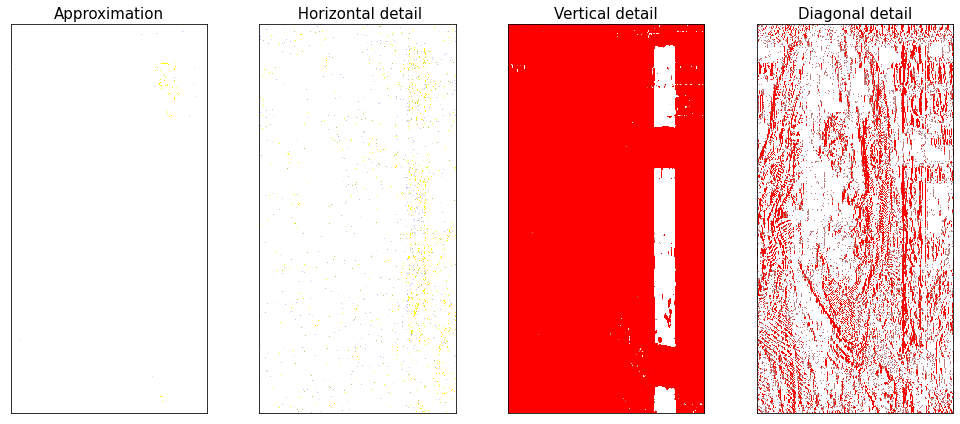

In [120]:
titles = ['Approximation', ' Horizontal detail', 'Vertical detail', 'Diagonal detail']

def graficarWaveletTrans(coef):
    LL, (LH, HL, HH) = coef
    fig = plt.figure(figsize=(14,6))
    for i, a in enumerate([LL, LH, HL, HH]):
        ax = fig.add_subplot(1,4,i+1)
        ax.imshow(a, interpolation="nearest", cmap='gray') 
        ax.set_title(titles[i], fontsize=15)
        ax.set_xticks([])
        ax.set_yticks([])
        
    fig.tight_layout() 
    plt.show()
    

coef = pywt.dwt2(billete_mejorado, 'bior1.3') 

graficarWaveletTrans(coef)

In [122]:
def mostrarEstadisticas(billete): 
    print("Varianza:   {} ".format(np.var(billete)))
    print("Oblicuidad: {} ".format(np.mean(skew(billete)))) 
    print("Curtosis:   {} ".format(np.mean(kurtosis(billete))))
    print("Entropía:   {} ".format(np.mean(entropy(billete))))
    
mostrarEstadisticas(coef[1][2])

Varianza:   1.2329350721278518 
Oblicuidad: 0.0007697693654623772 
Curtosis:   2.473014647452366 
Entropía:   nan 


In [124]:
def normalizar(x): 
    return np.array((x - np.min(x)) / (np.max(x) - np.min(x)))

# Guardando un np.ndarray como png, usando matplotlib
plt.imsave("images_processed/billete_wavelet.png", normalizar(coef[1][2])) 

print(">>>>>> Imagen guardada <<<<<")

>>>>>> Imagen guardada <<<<<


In [125]:
billete_mejorado = cv2.imread("images_processed/billete_wavelet.png") 
print(">>>>>> Imagen cargada<<<<<")

>>>>>> Imagen cargada<<<<<


In [126]:
coef = pywt.dwt2(billete_mejorado, 'bior1.3') 
mostrarEstadisticas(coef[1][2])

Varianza:   45.13420293770471 
Oblicuidad: -0.05473468176206596 
Curtosis:   2.738666498777437 
Entropía:   nan 


In [127]:
#NaN , que significa "no es un número", es un tipo de dato numérico que se utiliza para representar cualquier valor indefinido o no representable.

In [129]:
from PIL import Image
from autocrop import Cropper

cropper = Cropper()

# Get a Numpy array of the cropped image
cropped_array = cropper.crop('images/ejemplo.png')

# Save the cropped image with PIL
cropped_image = Image.fromarray(cropped_array)
cropped_image.save('cropped.png')

AttributeError: 'NoneType' object has no attribute '__array_interface__'